<a href="https://colab.research.google.com/github/VishnuGupta5883/appliedai/blob/master/Compute_Performance_metrics_without_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

#Load 5_a.csv, 5_b.csv, into a pandas dataFrames.
df1 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/5_a.csv")
df2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/5_b.csv")
df3 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/5_c.csv")
df4 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/5_d.csv")
#data1['y'].value_counts()
#print(df1.head())

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [3]:
# write your code here
df1['y_pred'] = df1['proba'].apply(lambda x: 0.0 if x < 0.5 else 1.0)
# 1. Confusion Matrix
conf_mat = np.zeros((2,2),dtype=int)
for index, row in df1.iterrows():
  if row["y"]==0.0 and row["y_pred"] == 0.0:
    conf_mat[0][0] = conf_mat[0][0] + 1
  elif row["y"]==1.0 and row["y_pred"] == 0.0:
    conf_mat[0][1] = conf_mat[0][1] + 1
  elif row["y"]==0.0 and row["y_pred"] == 1.0:
    conf_mat[1][0] = conf_mat[1][0] + 1
  elif row["y"]==1.0 and row["y_pred"] == 1.0:
    conf_mat[1][1] = conf_mat[1][1] + 1

print("Confusion Matrix :",conf_mat)

#2 Compute F1 Score

calc_precision = conf_mat[1][1]/(conf_mat[1][0]+conf_mat[1][1]) # compute Precision
calc_recall    = conf_mat[1][1]/(conf_mat[0][1]+conf_mat[1][1]) # compute Recall

f1 = 2 *((calc_precision * calc_recall)/(calc_precision + calc_recall)) 
print("F1 Score :",f1)

#3. Compute AUC score
df_a = df1[['y','proba']] # pick only required fields
#df_a.head()
a=df_a.sort_values(['proba'], ascending=[False])

arr = a.proba.unique()
#print(arr[0])

#df['color'] = np.where(df['Set']=='Z', 'green', 'red')
tpr=[]
fpr=[]
for i in range(len(a)):
  a['y_tow']= np.where(a['proba'] >= arr[i],1.0,0.0)
  #print(a.head(10))
  tp = [x for x,y in zip(a['y'],a['y_tow'])if x == 1.0 and y == 1.0]
  fp = [x for x,y in zip(a['y'],a['y_tow'])if x == 0.0 and y == 1.0]
  tn = [x for x,y in zip(a['y'],a['y_tow'])if x == 0.0 and y == 0.0]
  fn = [x for x,y in zip(a['y'],a['y_tow'])if x == 1.0 and y == 0.0]
  tpr.append(len(tp)/(len(tp) + len(fn)))
  fpr.append(len(fp)/(len(fp) + len(tn)))
  a.pop('y_tow') 

#print(tpr)

AUC_score = np.trapz(tpr,fpr)
print("AUC score",AUC_score)

#4. Compute Accuracy Score

Ac_score = (conf_mat[1][1] + conf_mat[0][0]) /len(df1)
print("Accuracy Score :", Ac_score)





Confusion Matrix : [[    0     0]
 [  100 10000]]
F1 Score : 0.9950248756218906
AUC score 0.48829900000000004
Accuracy Score : 0.9900990099009901


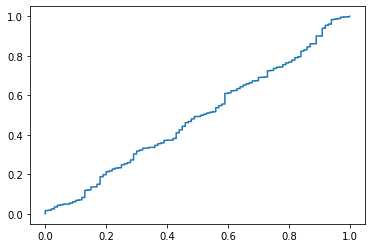

In [4]:
# task-a ROC curve

import matplotlib.pyplot as plt
plt.plot(fpr,tpr)

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [5]:
#df2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/5_b.csv")
df2['y_pred'] = df2['proba'].apply(lambda x: 0.0 if x < 0.5 else 1.0)
df2.head(10)
df2['y'].value_counts()

# write your code here
# 1. Confusion Matrix
conf_mat = np.zeros((2,2),dtype=int)
for index, row in df2.iterrows():
  if row["y"]==0.0 and row["y_pred"] == 0.0:
    conf_mat[0][0] = conf_mat[0][0] + 1
  elif row["y"]==1.0 and row["y_pred"] == 0.0:
    conf_mat[0][1] = conf_mat[0][1] + 1
  elif row["y"]==0.0 and row["y_pred"] == 1.0:
    conf_mat[1][0] = conf_mat[1][0] + 1
  elif row["y"]==1.0 and row["y_pred"] == 1.0:
    conf_mat[1][1] = conf_mat[1][1] + 1

print("Confusion Matrix :",conf_mat)

#2 Compute F1 Score

calc_precision = conf_mat[1][1]/(conf_mat[1][0]+conf_mat[1][1]) # compute Precision
calc_recall    = conf_mat[1][1]/(conf_mat[0][1]+conf_mat[1][1]) # compute Recall

f1 = 2 *((calc_precision * calc_recall)/(calc_precision + calc_recall)) 
print("F1 Score :",f1)

#3. Compute AUC score
df_a = df2[['y','proba']] # pick only required fields
#df_a.head()
a=df_a.sort_values(['proba'], ascending=[False])

arr = a.proba.unique()
#print(arr[0])

#df['color'] = np.where(df['Set']=='Z', 'green', 'red')
tpr=[]
fpr=[]
for i in range(len(a)):
  a['y_tow']= np.where(a['proba'] >= arr[i],1.0,0.0)
  #print(a.head(10))
  tp = [x for x,y in zip(a['y'],a['y_tow'])if x == 1.0 and y == 1.0]
  fp = [x for x,y in zip(a['y'],a['y_tow'])if x == 0.0 and y == 1.0]
  tn = [x for x,y in zip(a['y'],a['y_tow'])if x == 0.0 and y == 0.0]
  fn = [x for x,y in zip(a['y'],a['y_tow'])if x == 1.0 and y == 0.0]
  tpr.append(len(tp)/(len(tp) + len(fn)))
  fpr.append(len(fp)/(len(fp) + len(tn)))
  a.pop('y_tow') 

#print(tpr)

AUC_score = np.trapz(tpr,fpr)
print("AUC score",AUC_score)

#4. Compute Accuracy Score

Ac_score = (conf_mat[1][1] + conf_mat[0][0]) /len(df2)
print("Accuracy Score :", Ac_score)




Confusion Matrix : [[9761   45]
 [ 239   55]]
F1 Score : 0.2791878172588833
AUC score 0.9377570000000001
Accuracy Score : 0.9718811881188119


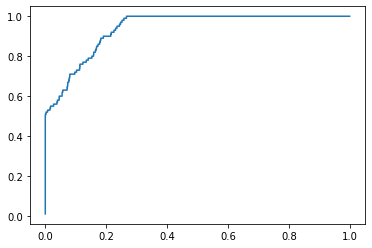

In [6]:
# task-B -ROC curve

import matplotlib.pyplot as plt
plt.plot(fpr,tpr)

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [0]:
 # write your code
#df3 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/5_c.csv")
#df3['y_pred'] = df2['proba'].apply(lambda x: 0.0 if x < 0.5 else 1.0)
df3.head(10)
df3['y'].value_counts()

df_a = df3[['y','prob']] # pick only required fields
#df_a.head()
a=df_a.sort_values(['prob'], ascending=[False])

arr = a.prob # icking only probability score
#print(len(arr))

A={}

for i in range(len(a)):
  a['y_pred']= np.where(a['prob'] >= arr[i],1.0,0.0)
  #print(a.head(10))
  tp = [x for x,y in zip(a['y'],a['y_pred'])if x == 1.0 and y == 1.0]
  fp = [x for x,y in zip(a['y'],a['y_pred'])if x == 0.0 and y == 1.0]
  tn = [x for x,y in zip(a['y'],a['y_pred'])if x == 0.0 and y == 0.0]
  fn = [x for x,y in zip(a['y'],a['y_pred'])if x == 1.0 and y == 0.0]
  fp_n = len(fp)
  fn_n = len(fn)
  mat = (500 * fn_n) + (100 * fp_n)
  A[arr[i]] = mat
  a.pop('y_pred')

#print(A)
A = sorted(A.items(), key=lambda x: x[1], reverse=False)
print("Best threshold and corresponding A value: ",A[1])

Best threshold and corresponding A value:  (0.22987164436159915, 141100)


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [0]:
#df4 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/5_d.csv")
#df4.head(10)

#1.Compute Mean Square Error
MSE =0.0

for index, row in df4.iterrows():
  MSE = MSE + ((row['y'] - row['pred'])*(row['y'] - row['pred']))
MSE = MSE/len(df4)

print("Mean Square Error is :", MSE)

#2.Compute MAPE:

error =  0.0
actual = 0.0
for index, row in df4.iterrows():
  error  = error  + abs(row['pred']-row['y'])
  actual = actual + row['y']
MAPE = error/actual

print("Mean Absolute percentage error:",MAPE)

#3 Compute R^2 error
avg_y = df4.y.mean()
SS_res=0.0
SS_tot=0.0


for index, row in df4.iterrows():
  SS_res = SS_res + ((row['y'] - row['pred'])*(row['y'] - row['pred']))
  SS_tot = SS_tot  + ((row['y'] - avg_y)*(row['y'] - avg_y))

r_square = 1 -(SS_res/SS_tot)

print("R square error",r_square)




Mean Square Error is : 177.16569974554707
Mean Absolute percentage error: 0.1291202994009687
R square error 0.9563582786990964
